### Dataset: Clothing Fit Dataset

In [1]:
import pandas as pd

In [2]:
# modecloth = pd.read_json('data/modcloth_final_data.json',lines=True)
renttherunway = pd.read_json('data/renttherunway_final_data.json',lines=True)

In [3]:
# modecloth.shape, 
renttherunway.shape

(192544, 15)

In [4]:
# modecloth.columns

In [5]:
renttherunway.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

In [6]:
renttherunway.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


### EDA

In [7]:
renttherunway.isna().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [8]:
from matplotlib import pyplot as plt 
import random

106


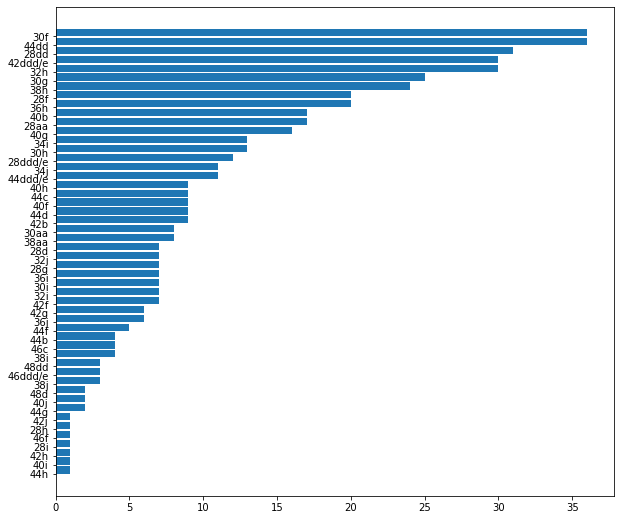

In [9]:
# distribution of bust_size
bust_size = renttherunway['bust size'].value_counts(normalize=False).sort_values(ascending=True)
plt.figure(figsize=(10, 9))
plt.barh(bust_size.index[:50], bust_size[:50], align='edge', height=0.8)
print(len(bust_size))

- There are a total of 106 sizes, the exact meaning of these sizes are not clear 
- We can onehot-enocode the categories

In [10]:
(29982 / len(renttherunway['weight']))*100

15.571505733754362

In [11]:
# distribution of weight 
if renttherunway['weight'].dtype==object: 
    renttherunway['weight'] = renttherunway.weight.str.strip('lbs').astype(float)
renttherunway['weight'] = renttherunway['weight'].fillna(random.choice(renttherunway['weight'][renttherunway['weight'].notna()]))

(array([7.0000e+00, 7.2100e+02, 4.0984e+04, 8.0475e+04, 6.0083e+04,
        7.1640e+03, 2.1580e+03, 6.0900e+02, 2.8700e+02, 5.6000e+01]),
 array([ 50.,  75., 100., 125., 150., 175., 200., 225., 250., 275., 300.]),
 <BarContainer object of 10 artists>)

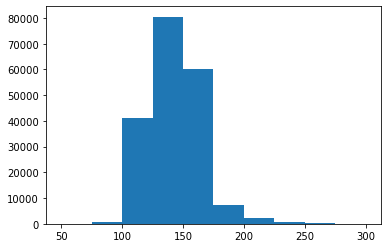

In [12]:
plt.hist(renttherunway['weight'])

- originally, there are 29982 missing values in the weight column, roughly around 15% of the total number of instances available 
- imputed the missing data in weight by random samples according to available data's distribution 

In [13]:
renttherunway['rented for'].value_counts(dropna=False)

wedding            57784
formal affair      40408
party              35626
everyday           16822
other              15388
work               15042
date                7388
vacation            4075
NaN                   10
party: cocktail        1
Name: rented for, dtype: int64

In [14]:
renttherunway['rented for'].fillna('Other', inplace=True)

- filled the NaN value in `rented for` column with 'Other'

In [15]:
renttherunway['body type'].value_counts(dropna=False)

hourglass            55349
athletic             43667
pear                 22135
petite               22131
full bust            15006
straight & narrow    14742
NaN                  14637
apple                 4877
Name: body type, dtype: int64

In [16]:
renttherunway['body type'].fillna('Not Provided', inplace=True)

- Impute the missing body type with 'Not Provide' 

In [17]:
renttherunway['category'].value_counts()

dress         92884
gown          44381
sheath        19316
shift          5365
jumpsuit       5184
              ...  
caftan            4
overcoat          2
sweatpants        2
crewneck          1
buttondown        1
Name: category, Length: 68, dtype: int64

In [18]:
def translate_height(height): 
    if type(height)==float:
        return height
    ft = height.split('\'')[0]
    inch = height.split('\'')[1].strip('\"')
    return int(ft)*12 + int(inch)

In [19]:
renttherunway['height'].value_counts()

5' 4"     28012
5' 6"     25680
5' 5"     24318
5' 7"     24020
5' 3"     20736
5' 2"     16762
5' 8"     16369
5' 9"     11371
5' 1"      7145
5' 10"     7041
5' 0"      4015
5' 11"     3114
6' 0"      1406
4' 11"     1014
6' 1"       364
4' 10"      212
6' 2"       124
4' 9"        60
6' 3"        31
4' 6"        20
6' 4"        18
4' 8"        17
4' 7"        16
6' 6"         2
Name: height, dtype: int64

(array([5.3000e+01, 2.7200e+02, 1.2174e+04, 3.7498e+04, 5.2330e+04,
        6.6069e+04, 1.8412e+04, 4.8840e+03, 1.5500e+02, 2.0000e+01]),
 array([54. , 56.4, 58.8, 61.2, 63.6, 66. , 68.4, 70.8, 73.2, 75.6, 78. ]),
 <BarContainer object of 10 artists>)

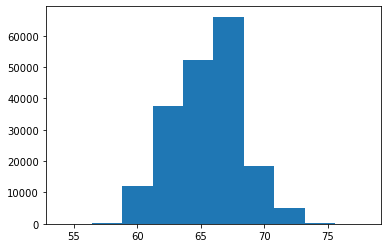

In [20]:
plt.hist(renttherunway['height'].apply(translate_height))

In [21]:
renttherunway['height']=renttherunway['height'].apply(translate_height)

<BarContainer object of 3 artists>

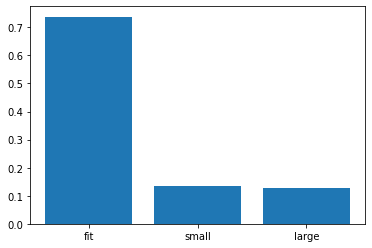

In [22]:
# check the fit distribution
fit = renttherunway.fit.value_counts(normalize=True)
plt.bar(fit.index, fit)

- since over 70% of the instances we get are `fit`, and with only 15% are of the other 2 categories; we should train our model with weights accordingly

(array([6.40000e+01, 8.04700e+03, 1.23413e+05, 4.43310e+04, 1.35290e+04,
        2.05200e+03, 5.50000e+01, 2.30000e+01, 5.00000e+00, 6.50000e+01]),
 array([  0. ,  11.7,  23.4,  35.1,  46.8,  58.5,  70.2,  81.9,  93.6,
        105.3, 117. ]),
 <BarContainer object of 10 artists>)

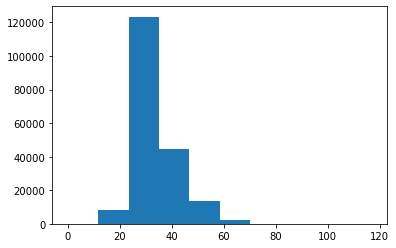

In [23]:
plt.hist(renttherunway['age'])

- most people are 30 years old
- reviewers' age range from 15~ to 70~

In [24]:
def translate_date(date: str): 
    return pd.to_datetime(date).date()

(array([1.5000e+01, 6.1800e+02, 2.9200e+03, 5.6660e+03, 1.5632e+04,
        2.0292e+04, 2.2475e+04, 3.4100e+04, 3.7256e+04, 5.3570e+04]),
 array([14916. , 15178.3, 15440.6, 15702.9, 15965.2, 16227.5, 16489.8,
        16752.1, 17014.4, 17276.7, 17539. ]),
 <BarContainer object of 10 artists>)

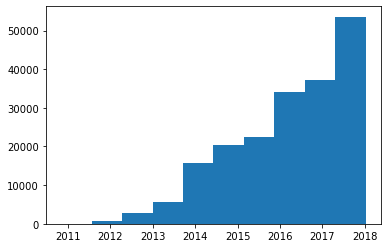

In [25]:
plt.hist(renttherunway['review_date'].apply(translate_date))

In [26]:
renttherunway['review_date']=renttherunway['review_date'].apply(translate_date)

- more recent instances than older ones 

(array([1.55636e+05, 3.67390e+04, 9.90000e+01, 3.70000e+01, 1.50000e+01,
        9.00000e+00, 4.00000e+00, 3.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([  0.,  63., 126., 189., 252., 315., 378., 441., 504., 567., 630.]),
 <BarContainer object of 10 artists>)

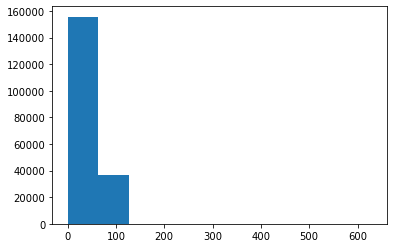

In [27]:
plt.hist(renttherunway['review_summary'].str.len())

(array([7.6994e+04, 7.1035e+04, 2.9880e+04, 9.4740e+03, 3.1310e+03,
        1.1660e+03, 4.8700e+02, 2.0900e+02, 1.1000e+02, 5.8000e+01]),
 array([   0. ,  209.8,  419.6,  629.4,  839.2, 1049. , 1258.8, 1468.6,
        1678.4, 1888.2, 2098. ]),
 <BarContainer object of 10 artists>)

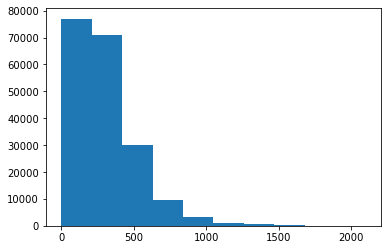

In [28]:
plt.hist(renttherunway['review_text'].str.len())

In [29]:
#TODO: create some correlation plots 
#TODO: finish the first 2 portions of the report 
features = renttherunway.drop(columns='fit')
features.head()

,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,420272,34d,2260466,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,2016-04-20
1,273551,34b,153475,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,2013-06-18
2,360448,NaN,1063761,170.0,10.0,party,This hugged in all the right places! It was a ...,Not Provided,It was a great time to celebrate the (almost) ...,sheath,64.0,4,116.0,2015-12-14
3,909926,34c,126335,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,2014-02-12
4,151944,34b,616682,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,2016-09-26


In [30]:
#TODO: report on interesting findings  
features.isna().sum()

user_id               0
bust size         18411
item_id               0
weight                0
rating               82
rented for            0
review_text           0
body type             0
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

1. There are missing values in 
- bust size (18411) - categorical, includes missing data and unseen data as a category 
- weight (29982) - continuous, lbs
- rating (82) - integer, out of 10
- rented for (10) - categorical, includes missing data and unseen data as a category 
- body type (14637) - categorical, missing data changed to 'not provided'
- height (677) - continuous, in inches, NaN remained unfilled (might be a good idea to fill it with random sample)
- age (960) - integer, fill NaN's with median

array([[<AxesSubplot:xlabel='user_id', ylabel='user_id'>,
        <AxesSubplot:xlabel='item_id', ylabel='user_id'>,
        <AxesSubplot:xlabel='weight', ylabel='user_id'>,
        <AxesSubplot:xlabel='rating', ylabel='user_id'>,
        <AxesSubplot:xlabel='height', ylabel='user_id'>,
        <AxesSubplot:xlabel='size', ylabel='user_id'>,
        <AxesSubplot:xlabel='age', ylabel='user_id'>],
       [<AxesSubplot:xlabel='user_id', ylabel='item_id'>,
        <AxesSubplot:xlabel='item_id', ylabel='item_id'>,
        <AxesSubplot:xlabel='weight', ylabel='item_id'>,
        <AxesSubplot:xlabel='rating', ylabel='item_id'>,
        <AxesSubplot:xlabel='height', ylabel='item_id'>,
        <AxesSubplot:xlabel='size', ylabel='item_id'>,
        <AxesSubplot:xlabel='age', ylabel='item_id'>],
       [<AxesSubplot:xlabel='user_id', ylabel='weight'>,
        <AxesSubplot:xlabel='item_id', ylabel='weight'>,
        <AxesSubplot:xlabel='weight', ylabel='weight'>,
        <AxesSubplot:xlabel='rating'

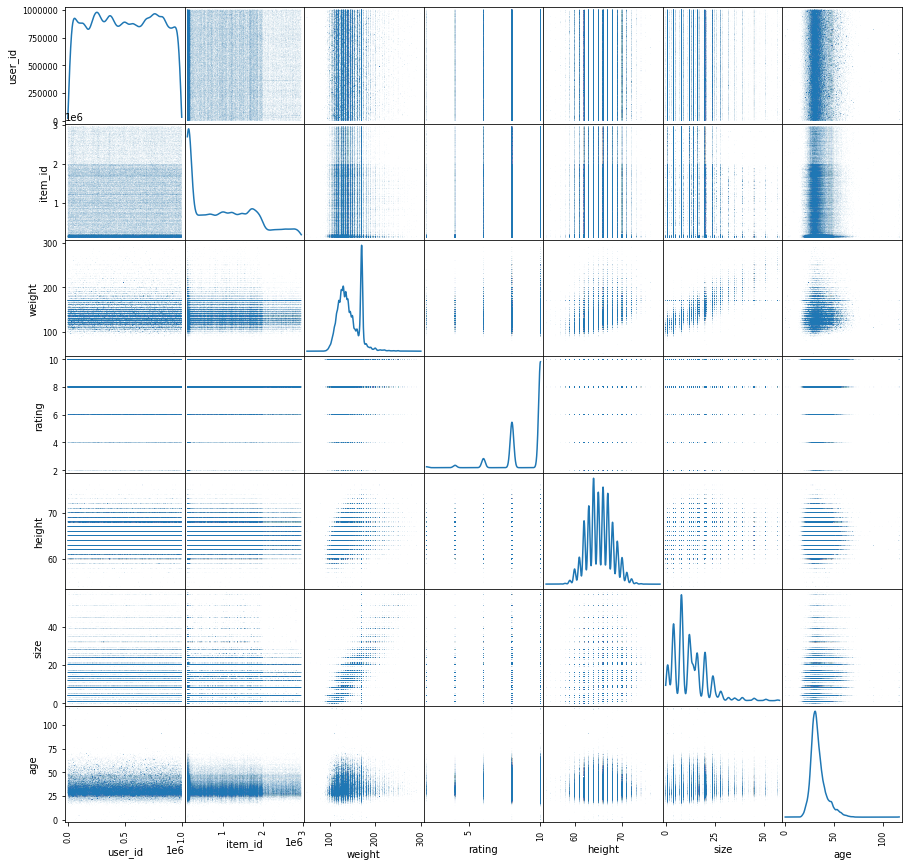

In [31]:
# TODO: correlation analysis
pd.plotting.scatter_matrix(features, figsize  = [15, 15],
    marker = ".", s = 0.2, diagonal = "kde")

In [ ]:
#TODO: describe the predictive task in the context of EDA findings 
#TODO: define baseline model 

- Turned categorical value into numerical representation 
- Normalized or scaled feature values  